In [1]:
import random

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import expon

pd.set_option('display.max_rows', 100, 'display.max_columns', 100)


from matplotlib.colors import ListedColormap
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from nptyping import NDArray, Float64, Shape

from plotting.plot_funcs import plot_cluster

seed = np.random.randint(0, 1e9)


In [2]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(max_cluster_number=6)
df = exp1.df
X = exp1.X
X.shape

(303, 2)

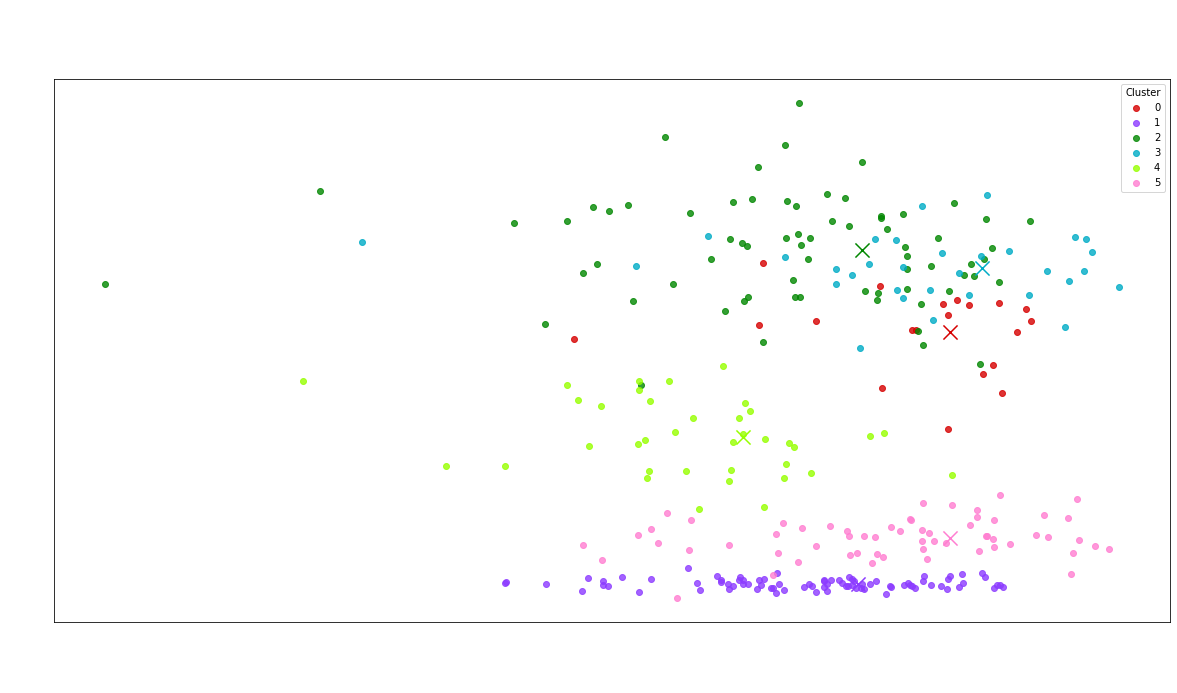

In [3]:
plot_cluster(exp1.df, "cluster", title="True Clusters")

### OPTICS

In [4]:
from cluster_initialization.init_class import Cluster_initialization, Routine
from plotting.plot_funcs import plot_responsibilities

cluster_init = Cluster_initialization(exp1.df, routine = Routine.random_inside)
params_array = cluster_init.init_params_array
init_params = cluster_init.init_params



#plot_responsibilities(exp1, params_array)

In [5]:
#plot_cluster(cluster_init.df, "init_cluster", title="Cluster initizialization")

#### DBScan

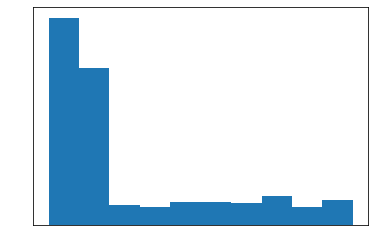

In [6]:
dbscan = DBSCAN(
    eps=0.1,
    min_samples=3,
    metric="mahalanobis", 
    metric_params={"V": np.cov(X, rowvar=False)}
    )
y_pred = dbscan.fit_predict(X)
plt.hist(y_pred)
plt.show()

#### KMeans + Shillouette Score

### EM-Algorithm

### single EM run

### multiple EM runs

In [7]:
from joblib import Parallel, delayed
from tqdm import tqdm
from em_algorithm.processing_results import process_parallel_results
from em_algorithm.em_funcs import run_EM
from model_selection.scoreboard import create_scoreboard

In [8]:
from copy import deepcopy
pd.options.mode.chained_assignment = None 
N_data = 20
em_params = {
    "max_iter": 500,
    "em_tol": 1e-3,
    "min_mix_coef": 0.00
}

sub_results = {
    "init_params": [],
    "df_scores": [],
    "df_scores_na": [],
}
init_routines = ['OPTICS', 'random_inside'] #, 'OPTICS_weighted', 'random',
run_results = {init: deepcopy(sub_results) for init in init_routines} 

run_data = {}
for n_data in tqdm(range(N_data)):
    exp = Experiment(max_cluster_number=6)
    df, X = exp.df, exp.X
    run_data[n_data] = exp
    for init in tqdm(init_routines):
        cluster_init = Cluster_initialization(df, routine = init)
        params_array = cluster_init.init_params_array
        init_params = cluster_init.init_params
        cluster_init.sample(N_cluster_max=10, N_runs_per_clusternumber=5)
        init_params_arrays = cluster_init.sampled_init_params_array
        parallel_results = Parallel(n_jobs=10)(delayed(run_EM)(X, init_param_array, **em_params) for init_param_array in tqdm(init_params_arrays))

        results = process_parallel_results(parallel_results)
        df_scores, df_scores_na = create_scoreboard(results, X)
        print(f"Number of Singularites: {len(df_scores_na.index)}")

        run_results[init]["init_params"].append(cluster_init)
        run_results[init]["df_scores"].append(df_scores)
        run_results[init]["df_scores_na"].append(df_scores_na)

  0%|          | 0/20 [00:00<?, ?it/s]




100%|██████████| 50/50 [00:02<00:00, 21.94it/s]


Number of Singularites: 0



  5%|▌         | 1/20 [00:05<01:37,  5.15s/it]

Number of Singularites: 28




100%|██████████| 50/50 [00:00<00:00, 149.21it/s]


Number of Singularites: 0




 10%|█         | 2/20 [01:11<12:22, 41.25s/it]

Number of Singularites: 33




100%|██████████| 48/48 [00:00<00:00, 343.78it/s]


Number of Singularites: 0




 15%|█▌        | 3/20 [01:21<07:38, 27.00s/it]

Number of Singularites: 6




100%|██████████| 50/50 [00:00<00:00, 168.51it/s]


Number of Singularites: 0




 20%|██        | 4/20 [01:35<05:48, 21.77s/it]

Number of Singularites: 18




100%|██████████| 50/50 [00:00<00:00, 227.68it/s]


Number of Singularites: 0




 25%|██▌       | 5/20 [02:11<06:45, 27.03s/it]

Number of Singularites: 3




100%|██████████| 49/49 [00:00<00:00, 124.67it/s]


Number of Singularites: 0




 30%|███       | 6/20 [02:16<04:32, 19.43s/it]

Number of Singularites: 0



100%|██████████| 7/7 [00:00<00:00, 7208.48it/s]


Number of Singularites: 0




 35%|███▌      | 7/20 [02:29<03:44, 17.24s/it]

Number of Singularites: 0



100%|██████████| 15/15 [00:00<00:00, 7513.98it/s]


Number of Singularites: 0




 40%|████      | 8/20 [02:57<04:08, 20.70s/it]

Number of Singularites: 2




100%|██████████| 50/50 [00:00<00:00, 89.23it/s]


Number of Singularites: 0



 45%|████▌     | 9/20 [03:26<04:16, 23.28s/it]

Number of Singularites: 22




100%|██████████| 49/49 [00:00<00:00, 246.87it/s]


Number of Singularites: 0




 50%|█████     | 10/20 [03:41<03:27, 20.74s/it]

Number of Singularites: 33




100%|██████████| 50/50 [00:00<00:00, 196.98it/s]


Number of Singularites: 0



 55%|█████▌    | 11/20 [03:59<03:00, 20.04s/it]

Number of Singularites: 30




100%|██████████| 50/50 [00:00<00:00, 187.76it/s]


Number of Singularites: 0



 60%|██████    | 12/20 [04:09<02:15, 16.88s/it]

Number of Singularites: 33




100%|██████████| 50/50 [00:00<00:00, 144.81it/s]


Number of Singularites: 0




 65%|██████▌   | 13/20 [04:40<02:27, 21.12s/it]

Number of Singularites: 11



100%|██████████| 7/7 [00:00<?, ?it/s]


Number of Singularites: 0




 70%|███████   | 14/20 [04:59<02:02, 20.40s/it]

Number of Singularites: 0



100%|██████████| 15/15 [00:00<00:00, 15047.73it/s]


Number of Singularites: 0




 75%|███████▌  | 15/20 [05:05<01:20, 16.08s/it]

Number of Singularites: 10




100%|██████████| 49/49 [00:00<00:00, 294.25it/s]


Number of Singularites: 0




 80%|████████  | 16/20 [05:19<01:02, 15.67s/it]

Number of Singularites: 17




100%|██████████| 50/50 [00:00<00:00, 313.34it/s]


Number of Singularites: 0



 85%|████████▌ | 17/20 [05:43<00:54, 18.18s/it]

Number of Singularites: 26




100%|██████████| 50/50 [00:00<00:00, 159.67it/s]


Number of Singularites: 0



 90%|█████████ | 18/20 [05:58<00:34, 17.14s/it]

Number of Singularites: 32




100%|██████████| 42/42 [00:00<00:00, 77.13it/s]


Number of Singularites: 0




 95%|█████████▌| 19/20 [06:26<00:20, 20.40s/it]

Number of Singularites: 0



100%|██████████| 7/7 [00:00<00:00, 7018.92it/s]


Number of Singularites: 0




100%|██████████| 20/20 [06:48<00:00, 20.43s/it]

Number of Singularites: 0


In [9]:
df_list = []
for init in run_results.keys():
    for i, df in enumerate(run_results[init]["df_scores"]):

        df["init_routine"] = init
        df["dataset"] = i
        df["True_Cluster_number"] = run_data[i].n_cluster
        df_list.append(df)
df_total = pd.concat(df_list)

In [10]:
import seaborn as sns
from plotting.mc_simulation.criteria_performance import add_score_performance_plot
from plotting.mc_simulation.init_performance import add_init_rout_performance_plot

settings = {
    "ax_title_size": 18,
    "axis_label_size": 20
}

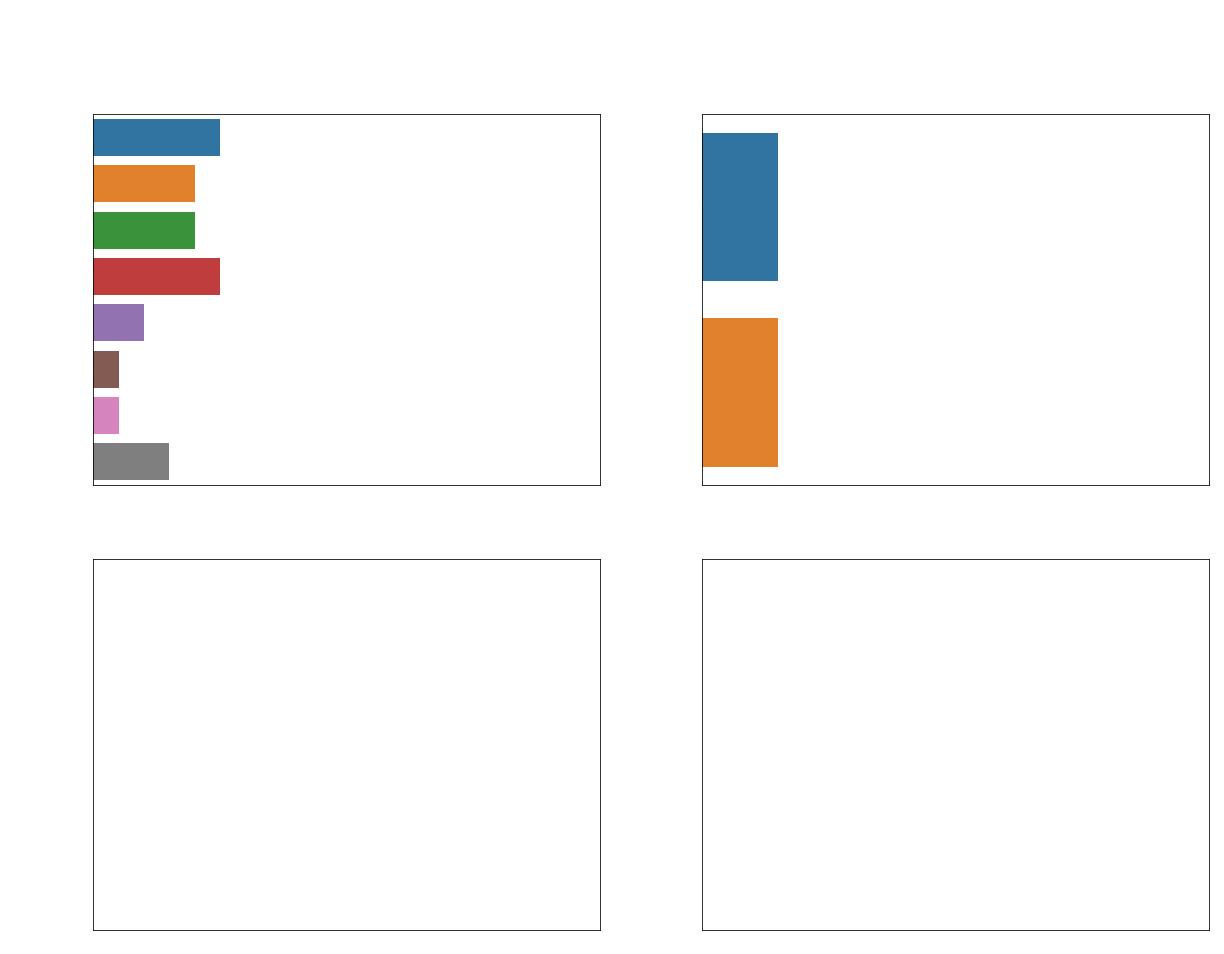

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,15)
fig.suptitle("Prediction of Number of Clusters", color="white", size=30)

add_score_performance_plot(df_total, axs[0,0], settings)
total_rank = "Total_prop_rank"
add_init_rout_performance_plot(df_total,axs[0,1], settings, total_rank=total_rank)

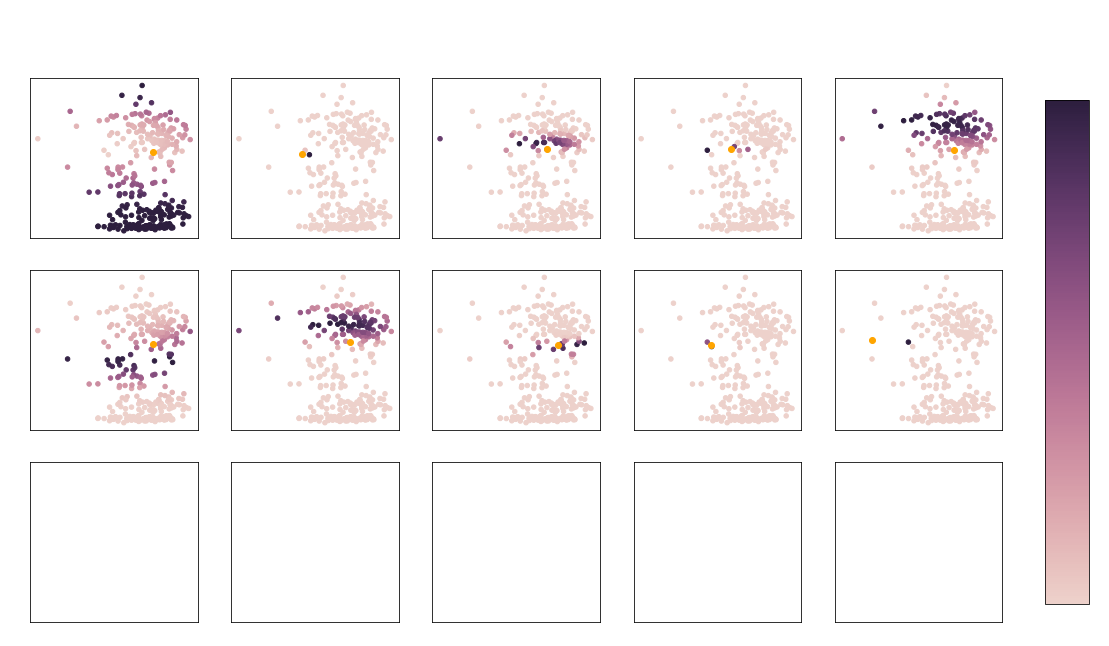

In [12]:
model_idx = 5

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

In [13]:
results["params"][df_scores.param_index[model_idx]][::4]

array([0.13907906, 0.04720498, 0.12278842, 0.08451174, 0.09015463,
       0.20532292, 0.0638844 , 0.22230945, 0.02430765, 0.00043675])

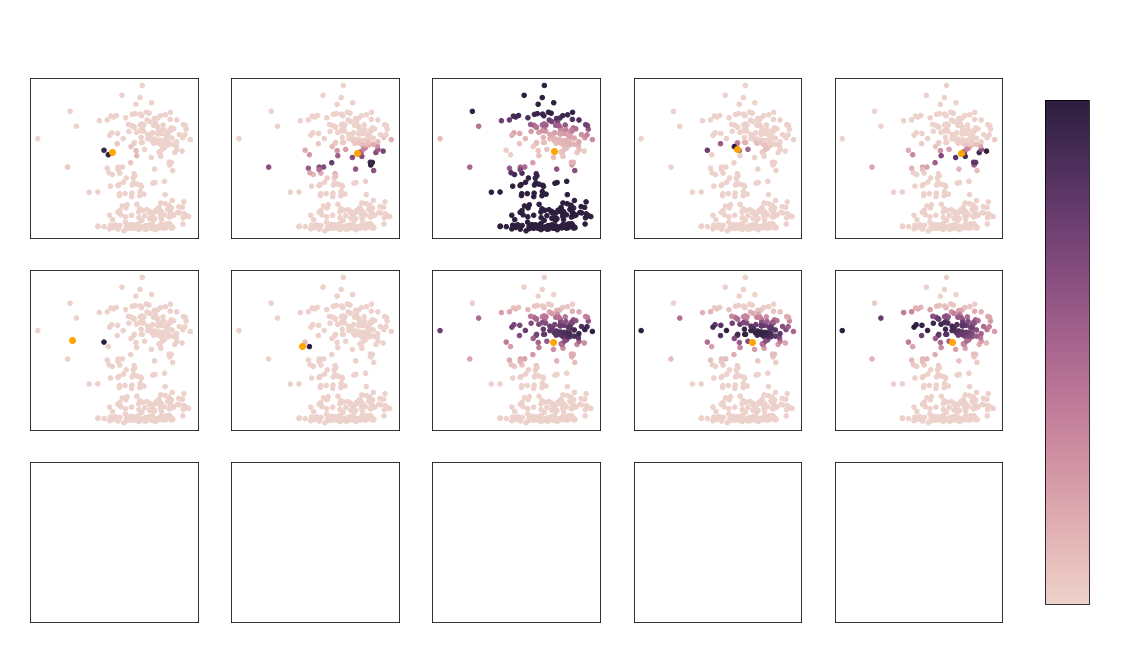

In [14]:
model_idx = 0

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

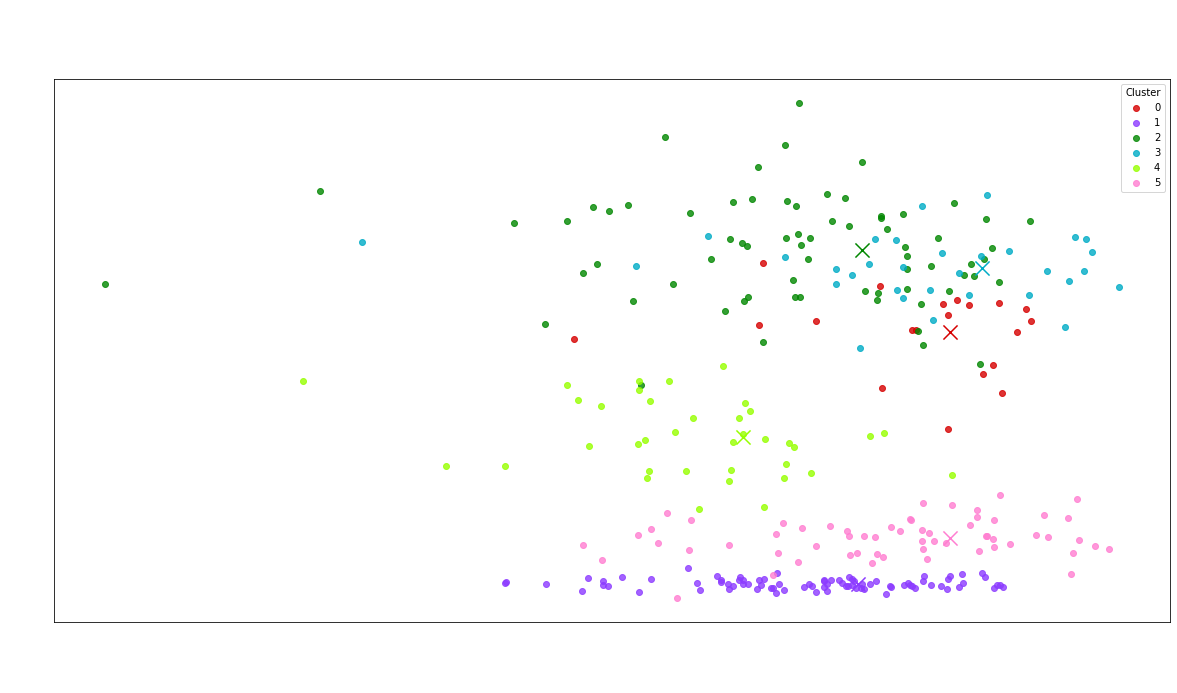

In [15]:
plot_cluster(exp1.df, "cluster", title="True Clusters")